# Lab-04 : Quantum Fourier Transform(QFT)
```
Creator : Ajeet Kumar Bhardwaj
Lab-04 : Quantum Fourier Transform
```

[The Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) occurs in many different formats throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation.

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import QuantumCircuit

import numpy as np

### QFT with Single Qubit

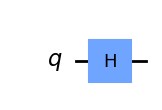

In [3]:
QFT_1 = QuantumCircuit(1)

# adding gates to our circuit 
QFT_1.h(0)
QFT_1.draw(output="mpl")


In [4]:
U = Operator(QFT_1)

array_to_latex(U)

<IPython.core.display.Latex object>

### QFT with 2 Qubit

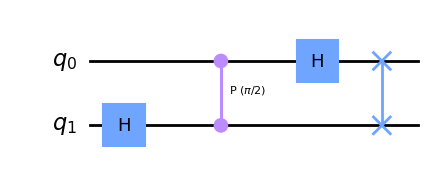

In [5]:
QFT_2 = QuantumCircuit(2)

QFT_2.h(1)
QFT_2.cp(np.pi/2, 0, 1)
QFT_2.h(0)
QFT_2.swap(0, 1)

QFT_2.draw(output='mpl')

In [6]:
U = Operator(QFT_2)

array_to_latex(U)

<IPython.core.display.Latex object>

### QFT with 3 Qubit

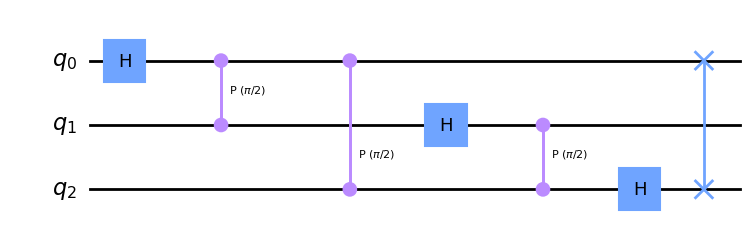

In [14]:
QFT_3 = QuantumCircuit(3)

QFT_3.h(0)
QFT_3.cp(np.pi/2, 0, 1)
QFT_3.cp(np.pi/2, 0, 2)
QFT_3.h(1)
QFT_3.cp(np.pi/2, 1, 2)
QFT_3.h(2)
QFT_3.swap(0, 2)


QFT_3.draw(output='mpl')

In [15]:
U = Operator(QFT_3)
array_to_latex(U)

<IPython.core.display.Latex object>

### QFT with 4 Qubit

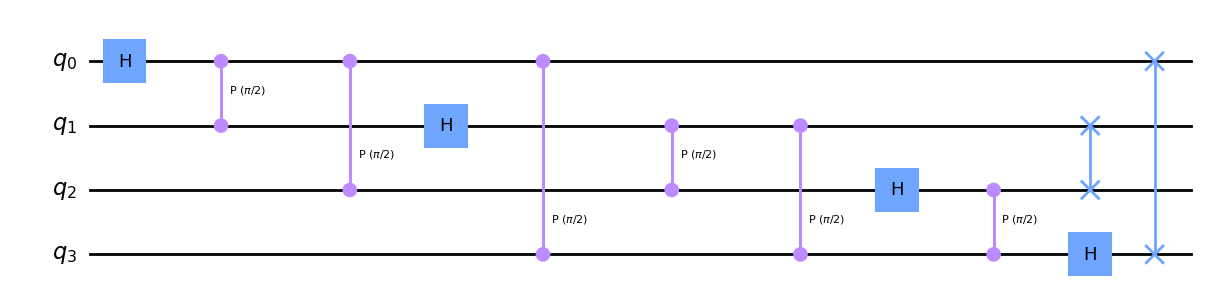

In [16]:
QFT_4 = QuantumCircuit(4)

QFT_4.h(0)
QFT_4.cp(np.pi/2, 0, 1)
QFT_4.cp(np.pi/2, 0, 2)
QFT_4.h(1)
QFT_4.cp(np.pi/2, 0, 3)
QFT_4.cp(np.pi/2, 1, 2)
QFT_4.cp(np.pi/2, 1, 3)
QFT_4.h(2)
QFT_4.cp(np.pi/2, 2, 3)
QFT_4.swap(1, 2)
QFT_4.h(3)
QFT_4.swap(0, 3)


QFT_4.draw(output='mpl')

In [17]:
U = Operator(QFT_4)
array_to_latex(U)

<IPython.core.display.Latex object>

In [23]:
np.size(U)

256

In [31]:
from scipy import *
from scipy.linalg import svd, inv, det, norm, eig, eigvals, diagsvd

In [78]:
U, D, Vh = svd(U)
u = Operator(U)
array_to_latex(u)

<IPython.core.display.Latex object>

In [77]:
u = Operator(D)
array_to_latex(u)

<IPython.core.display.Latex object>

In [76]:
u = Operator(Vh)
array_to_latex(u)

<IPython.core.display.Latex object>

In [65]:
norm(U)

2.82842712474619

In [66]:
det(U)

(3.3306690738754696e-16+0.9999999999999982j)

In [68]:
r = inv(U)
array_to_latex(r)

<IPython.core.display.Latex object>

In [74]:
u, v = eig(U)
u = Operator(u)
array_to_latex(u)

<IPython.core.display.Latex object>

In [75]:
v = Operator(v)
array_to_latex(v)

<IPython.core.display.Latex object>

In [61]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector

# Function to create the Quantum Fourier Transform circuit for n qubits
# Function to create the Quantum Fourier Transform circuit for n qubits
def qft_circuit(n):
    circuit = QuantumCircuit(n)

    # Apply Hadamard gates to all qubits at the beginning
    # Note : because there is no difference in the output
    for qubit in range(n):
        circuit.h(qubit)

    # Apply controlled phase gates
    for target_qubit in range(n):
        for control_qubit in range(target_qubit):
            angle = 2 * np.pi / (2**(target_qubit - control_qubit + 1))
            circuit.cp(angle, control_qubit, target_qubit)

    # Swap qubits for correct output ordering (optional)
    for qubit in range(n // 2):
        circuit.swap(qubit, n - 1 - qubit)

    return circuit


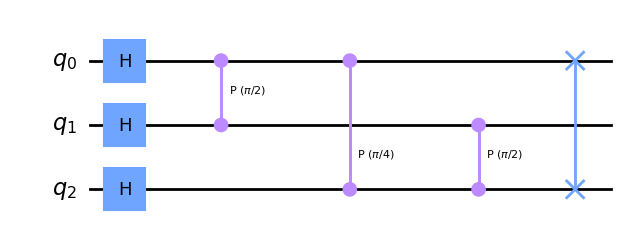

In [62]:
# Define the number of qubits
num_qubits = 3  # Change this to the desired number of qubits

# Create the QFT circuit
qft = qft_circuit(num_qubits)

# Draw the QFT circuit
qft.draw(output='mpl')


In [64]:
U = Operator(qft)
array_to_latex(U)

<IPython.core.display.Latex object>

There is a mismatch in the QFT 3 bit circuit output: because i applied hadamard gate in the beginning of the circuit for generalized qft function. 

Note : It's an execise to correct it !

In [54]:

# Simulate the QFT circuit and plot the Bloch vector for each qubit
simulator = Aer.get_backend('statevector_simulator')
compiled_qft = transpile(qft, simulator)
result = simulator.run(compiled_qft).result()
statevector = result.get_statevector()
display(statevector = 'latex')

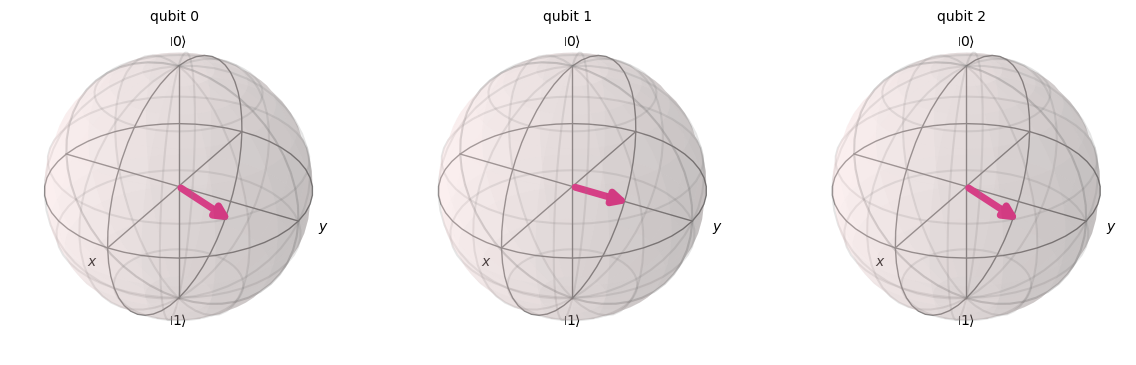

In [48]:
plot_bloch_multivector(statevector)


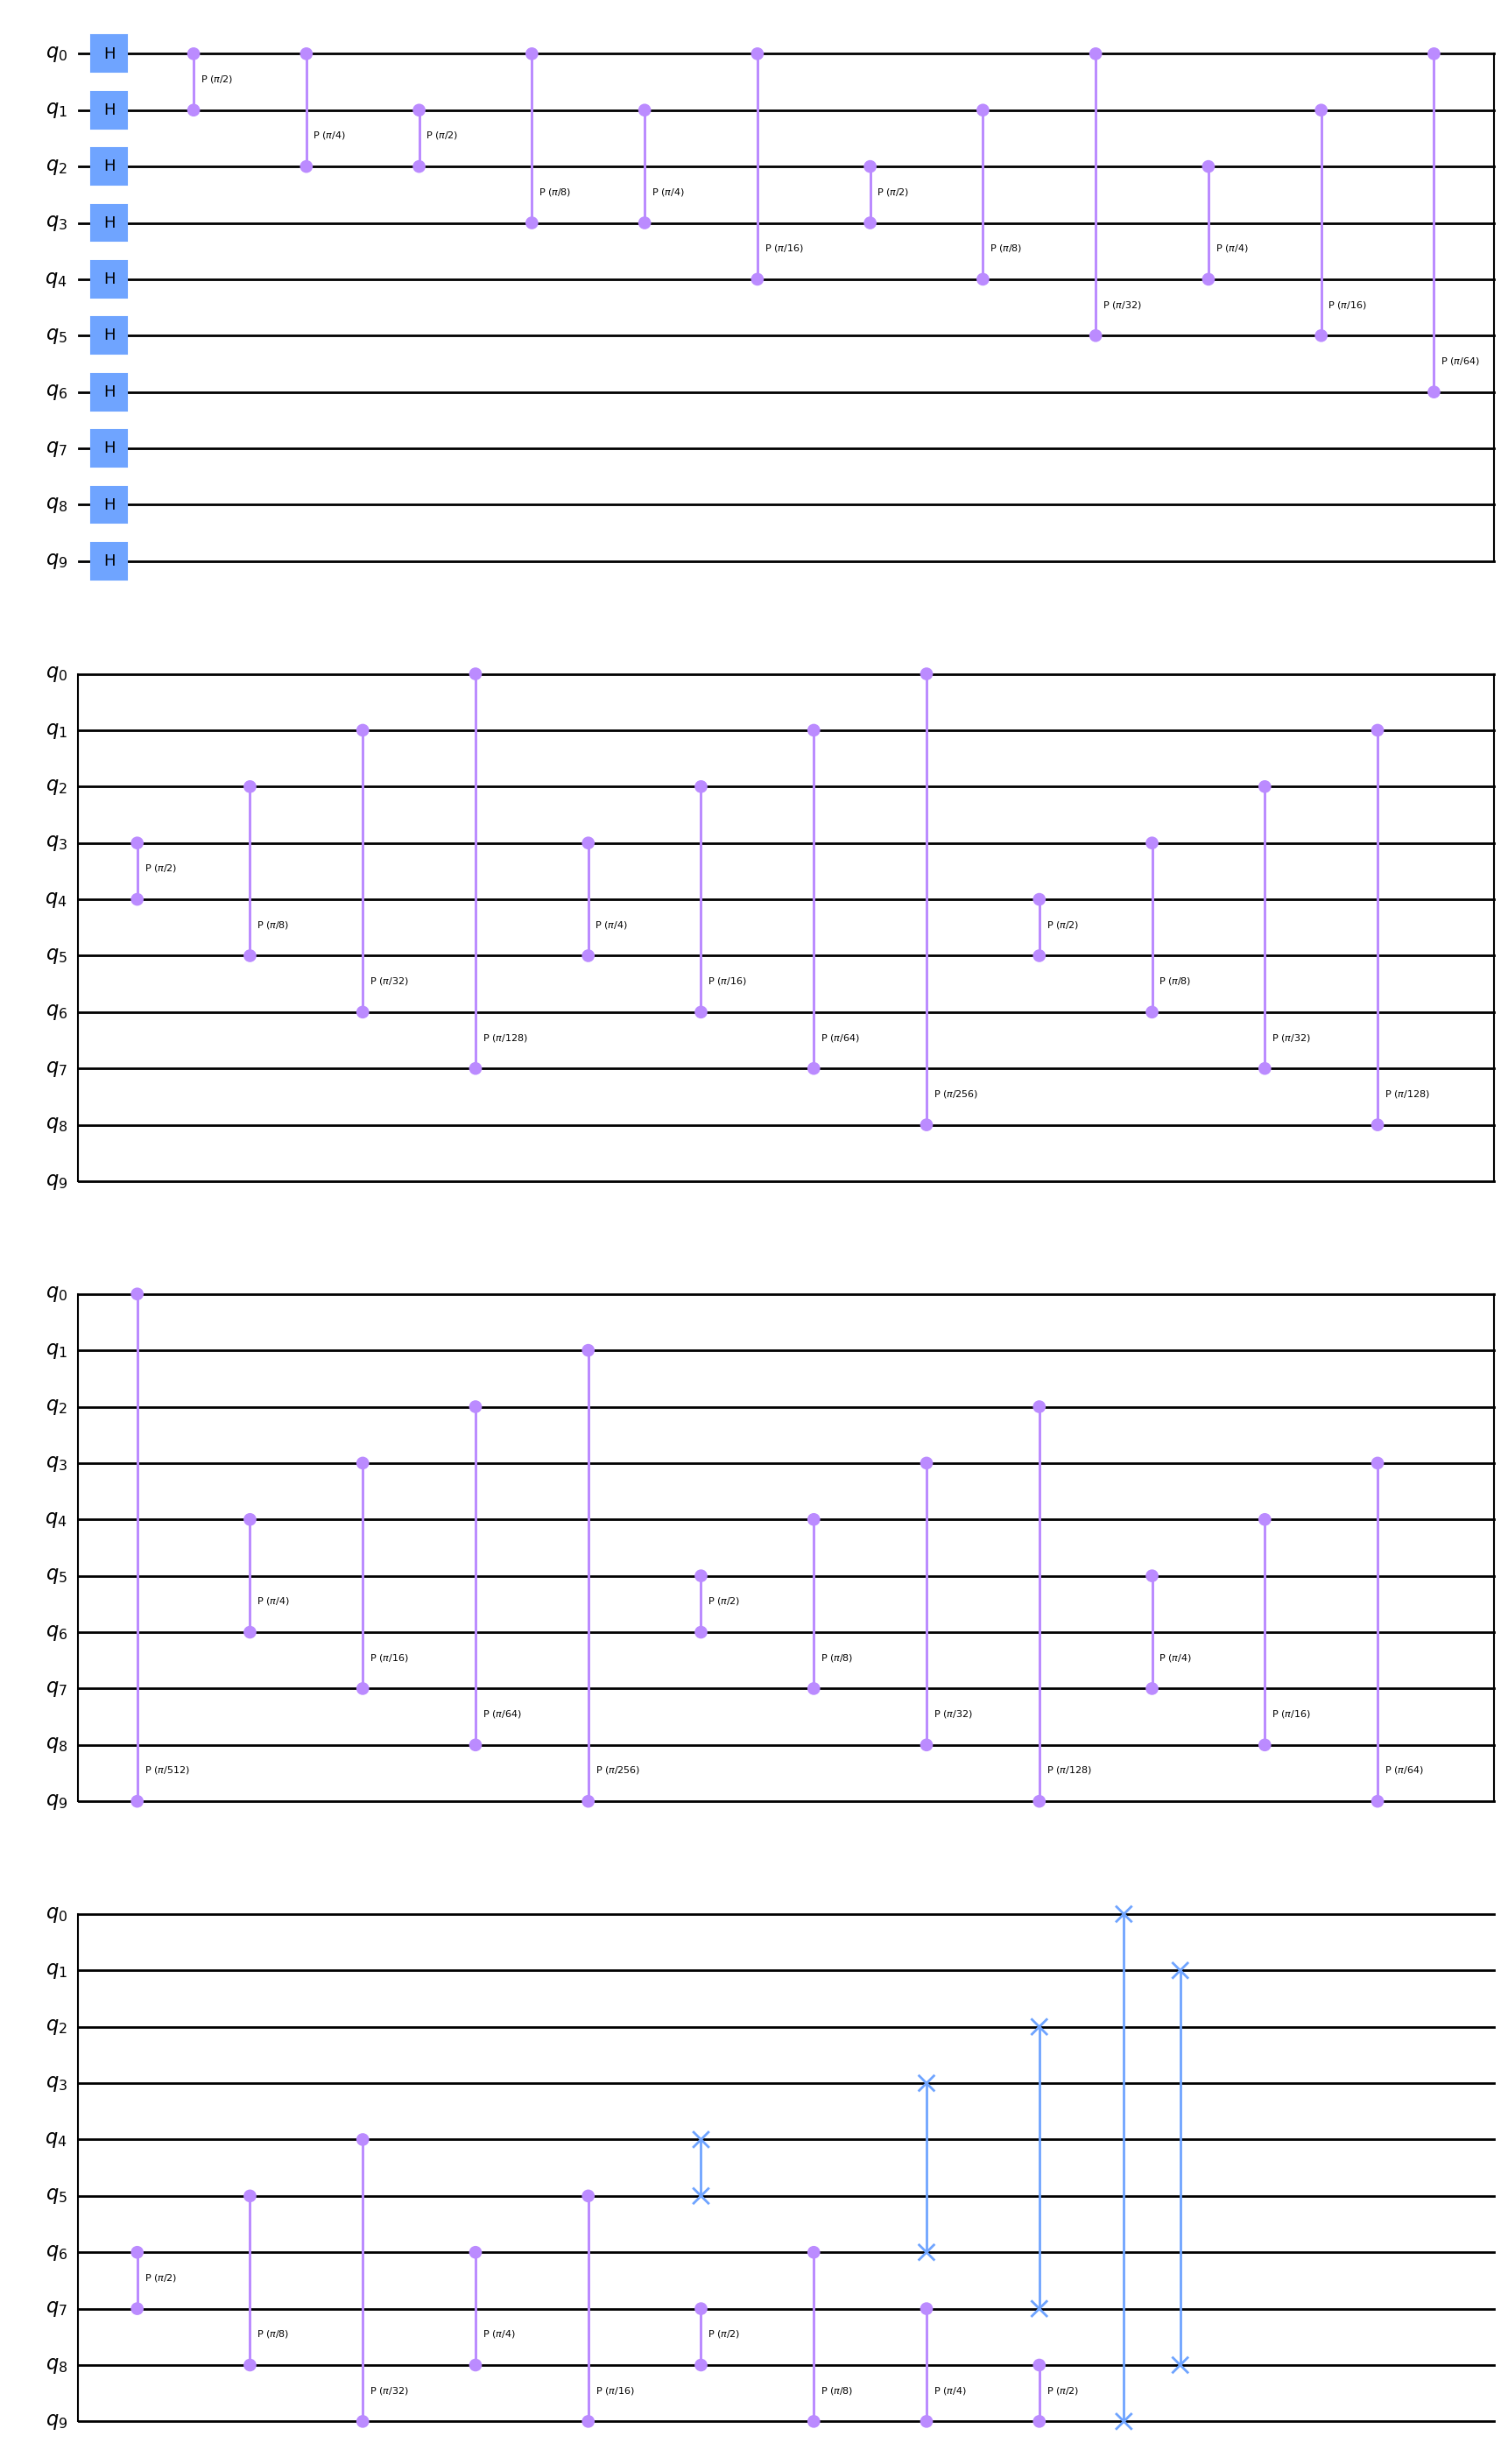

In [49]:
# Define the number of qubits
num_qubits = 10  # Change this to the desired number of qubits

# Create the QFT circuit
qft = qft_circuit(num_qubits)

# Draw the QFT circuit
qft.draw(output='mpl')


In [50]:

# Simulate the QFT circuit and plot the Bloch vector for each qubit
simulator = Aer.get_backend('statevector_simulator')
compiled_qft = transpile(qft, simulator)
result = simulator.run(compiled_qft).result()
statevector = result.get_statevector()
statevector

Statevector([ 0.03125   +0.j        ,  0.03125   +0.j        ,
              0.03125   +0.j        , ..., -0.00057521+0.03124471j,
             -0.03124765-0.00038349j,  0.03124941+0.00019175j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [69]:
vec = Operator(statevector)
array_to_latex(vec)

<IPython.core.display.Latex object>

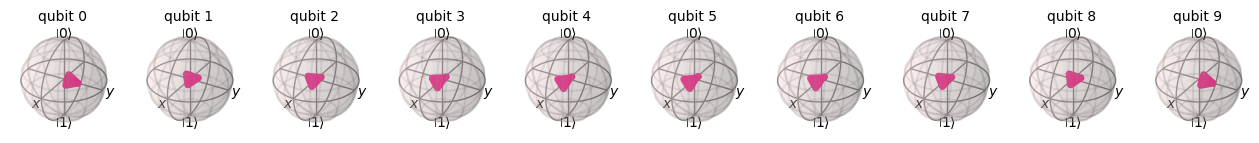

In [52]:
plot_bloch_multivector(statevector)


In [59]:
import qiskit.tools.jupyter
%qiskit_version_table